In [1]:
import pandas as pd

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1TVGDo8q5WEUeZCGnhvb1FTrC357jndiA/edit?gid=1922579162#gid=1922579162'
sheet_url_replace = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_replace)
df.head()

,Jenis Kelamin,Usia,Apakah Anda pernah mendengar istilah teknologi Artificial Intelligence (AI)?,"Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?",Teknologi AI apa yang paling sering Anda gunakan? (bisa memilih lebih dari satu),"Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?","Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?",Apakah Perguruan Tinggi (PT) Anda sudah memiliki pedoman/ panduan penggunaan AI dalam pembelajaran?,Seberapa nyaman Anda dengan integrasi teknologi AI dalam pembelajaran?,Seberapa paham Anda tentang pentingnya penggunaan teknologi AI secara bijak dan beretika?,"Menurut Anda, apakah penting bagi PTKI untuk memiliki pedoman dalam penggunaan teknologi AI?",Bagaimana Anda menilai kemampuan Anda dalam membedakan hasil kerja manusia dan hasil kerja AI?,"Menurut Anda, risiko apa saja yang muncul jika teknologi AI tidak digunakan secara etis dalam pembelajaran di PTKI? (Pilih yang relevan)","Menurut Anda, etika dan nilai keislaman apa saja yang harus dimiliki saat menggunakan teknologi AI? (Boleh lebih dari satu)",Apa langkah yang menurut Anda harus dilakukan PTKI untuk meningkatkan literasi AI di kalangan civitas akademik?
0,Laki-Laki,20–30 tahun,Ya,5,"Opsi 1, - Grammarly, - Google Translate, - Tur...",5,5,Ya,5,5,5,3,"- Plagiarisme akademik, - Ketergantungan pada ...","- Transparansi (Kejujuran), - Privasi dan Keam...","- Pelatihan AI bagi dosen dan mahasiswa, - Pen..."
1,Laki-Laki,20–30 tahun,Ya,5,- ChatGPT,5,3,Mungkin,4,4,4,3,"- Plagiarisme akademik, - Ketergantungan pada ...","- Transparansi (Kejujuran), - Privasi dan Keam...","- Pelatihan AI bagi dosen dan mahasiswa, - Pen..."
2,Laki-Laki,20–30 tahun,Ya,5,"- ChatGPT, - Grammarly, - Google Translate",5,5,Ya,5,4,4,3,- Hilangnya orisinalitas berpikir,- Tanggung Jawab,- Pelatihan AI bagi dosen dan mahasiswa
3,Laki-Laki,20–30 tahun,Ya,5,"- Canva, - Gemini, - ChatGPT",5,4,Mungkin,5,5,5,2,"- Plagiarisme akademik, - Ketergantungan pada ...","- Transparansi (Kejujuran), - Orisinalitas dan...","- Pelatihan AI bagi dosen dan mahasiswa, - Pen..."
4,Laki-Laki,20–30 tahun,Ya,5,"- Google Translate, - Google Meet, - Zoom, - C...",5,5,Mungkin,4,3,3,4,"- Plagiarisme akademik, - Ketergantungan pada ...","- Transparansi (Kejujuran), - Tanggung Jawab, ...","- Pelatihan AI bagi dosen dan mahasiswa, - Pen..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 15 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Jenis Kelamin                                                                                                                                        89 non-null     object
 1   Usia                                                                                                                                                 89 non-null     object
 2   Apakah Anda pernah mendengar istilah teknologi Artificial Intelligence (AI)?                                                                         89 non-null     object
 3   Jika ya

In [4]:
df['Jenis Kelamin'].unique()

array(['Laki-Laki', 'Perempuan'], dtype=object)

In [5]:
df['Usia'].unique()

array(['20–30 tahun', '< 20 tahun'], dtype=object)

In [6]:
df.columns = df.columns.str.strip()

In [7]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = [
    'Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?',
    'Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?',
    'Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?',
    'Seberapa nyaman Anda dengan integrasi teknologi AI dalam pembelajaran?',
    'Seberapa paham Anda tentang pentingnya penggunaan teknologi AI secara bijak dan beretika?',
    'Menurut Anda, apakah penting bagi PTKI untuk memiliki pedoman dalam penggunaan teknologi AI?',
    'Bagaimana Anda menilai kemampuan Anda dalam membedakan hasil kerja manusia dan hasil kerja AI?'
]

# Normalisasi menggunakan MinMaxScaler (mengubah rentang ke [0, 1])
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [8]:
# Encoding untuk kolom 'Jenis Kelamin'
gender_mapping = {'Laki-Laki': 0, 'Perempuan': 1}
df['Jenis_Kelamin_Encoded'] = df['Jenis Kelamin'].map(gender_mapping)

# Encoding untuk kolom 'Usia'
age_mapping = {'< 20 tahun': 0, '20–30 tahun': 1}
df['Usia_Encoded'] = df['Usia'].map(age_mapping)

# Encoding untuk kolom 'Apakah Anda pernah mendengar istilah teknologi Artificial Intelligence (AI)?'
ai_familiarity_mapping = {'Tidak': 0, 'Ya': 1}
col_name = 'Apakah Anda pernah mendengar istilah teknologi Artificial Intelligence (AI)?'
df['AI_Familiarity_Encoded'] = df[col_name].map(ai_familiarity_mapping)

# Encoding untuk kolom 'Apakah Perguruan Tinggi (PT) Anda sudah memiliki pedoman/ panduan penggunaan AI dalam pembelajaran?'
ai_guideline_mapping = {'Tidak': 0, 'Mungkin': 1, 'Ya': 2}
col_name = 'Apakah Perguruan Tinggi (PT) Anda sudah memiliki pedoman/ panduan penggunaan AI dalam pembelajaran?'
df['AI_Guideline_Encoded'] = df[col_name].map(ai_guideline_mapping)

scaler2 = MinMaxScaler()
df['AI_Guideline_Encoded'] = scaler2.fit_transform(df[['AI_Guideline_Encoded']])

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Preprocessing: Membersihkan data dan mengubah menjadi list
def clean_data(data_list):
    cleaned_data = []
    for item in data_list:
        if isinstance(item, str):  # Cek apakah item adalah string
            # Menghapus tanda '-' dan spasi di awal, kemudian split berdasarkan koma
            apps = [app.strip('- ').strip() for app in item.split(',')]
            # Menghapus duplikat dalam satu entri
            apps = list(set(filter(None, apps)))  # Filter None atau string kosong
        else:
            apps = []  # Jika bukan string (misalnya NaN), buat list kosong
        cleaned_data.append(apps)
    return cleaned_data

# Kolom yang akan diproses
columns_to_process = [
    'Teknologi AI apa yang paling sering Anda gunakan? (bisa memilih lebih dari satu)',
    'Menurut Anda, risiko apa saja yang muncul jika teknologi AI tidak digunakan secara etis dalam pembelajaran di PTKI? (Pilih yang relevan)',
    'Menurut Anda, etika dan nilai keislaman apa saja yang harus dimiliki saat menggunakan teknologi AI? (Boleh lebih dari satu)',
    'Apa langkah yang menurut Anda harus dilakukan PTKI untuk meningkatkan literasi AI di kalangan civitas akademik?'
]

prefix_mapping = {
    'Teknologi AI apa yang paling sering Anda gunakan? (bisa memilih lebih dari satu)': 'teknologi_',
    'Menurut Anda, risiko apa saja yang muncul jika teknologi AI tidak digunakan secara etis dalam pembelajaran di PTKI? (Pilih yang relevan)': 'risiko_',
    'Menurut Anda, etika dan nilai keislaman apa saja yang harus dimiliki saat menggunakan teknologi AI? (Boleh lebih dari satu)': 'etikaAI_',
    'Apa langkah yang menurut Anda harus dilakukan PTKI untuk meningkatkan literasi AI di kalangan civitas akademik?': 'langkah_'
}

# Proses setiap kolom
for column in columns_to_process:

    # Bersihkan data
    cleaned_data = clean_data(df[column])

    # One-hot encoding
    mlb = MultiLabelBinarizer()
    one_hot_encoded = mlb.fit_transform(cleaned_data)

    prefix = prefix_mapping[column]

    # Buat nama kolom baru dengan prefix
    new_column_names = [prefix + app.replace(' ', '_') for app in mlb.classes_]

    # Buat DataFrame dari hasil encoding
    df_encoded = pd.DataFrame(one_hot_encoded, columns=new_column_names)

    # Gabungkan hasil encoding ke DataFrame asli
    df = pd.concat([df, df_encoded], axis=1)

In [10]:
int_columns = df.select_dtypes(include=['number']).columns
df_cluster = df[int_columns]

df_cluster.info()
df_cluster.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 76 columns):
 #   Column                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                              --------------  -----  
 0   Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?  89 non-null     float64
 1   Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?                            89 non-null     float64
 2   Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?                                89 non-null     float64
 3   Seberap

,"Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?","Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?","Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?",Seberapa nyaman Anda dengan integrasi teknologi AI dalam pembelajaran?,Seberapa paham Anda tentang pentingnya penggunaan teknologi AI secara bijak dan beretika?,"Menurut Anda, apakah penting bagi PTKI untuk memiliki pedoman dalam penggunaan teknologi AI?",Bagaimana Anda menilai kemampuan Anda dalam membedakan hasil kerja manusia dan hasil kerja AI?,Jenis_Kelamin_Encoded,Usia_Encoded,AI_Familiarity_Encoded,...,etikaAI_Tabayun_(Verifikasi_dan_Validasi_Informasi),etikaAI_Tanggung_Jawab,etikaAI_Tanggung_Jawab_Sosial,etikaAI_Tidak_Melanggar_Syari’at_Islam,etikaAI_Tidak_menggunakan_AI_untuk_melakukan_tindak_penipuan_dan_kejahatan,etikaAI_Transparansi_(Kejujuran),langkah_Integrasi_AI_ke_dalam_kurikulum,langkah_Pelatihan_AI_bagi_dosen_dan_mahasiswa,langkah_Penelitian_tentang_AI_berbasis_nilai_Islam,langkah_Penyusunan_pedoman_etika_Islami_terkait_AI
0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.50,0,1,1,...,1,1,1,1,0,1,0,1,0,1
1,1.0,1.0,0.333333,0.5,0.666667,0.5,0.50,0,1,1,...,0,1,0,1,0,1,1,1,0,1
2,1.0,1.0,1.000000,1.0,0.666667,0.5,0.50,0,1,1,...,0,1,0,0,0,0,0,1,0,0
3,1.0,1.0,0.666667,1.0,1.000000,1.0,0.25,0,1,1,...,1,0,0,1,0,1,1,1,1,1
4,1.0,1.0,1.000000,0.5,0.333333,0.0,0.75,0,1,1,...,1,1,0,0,0,1,0,1,0,1


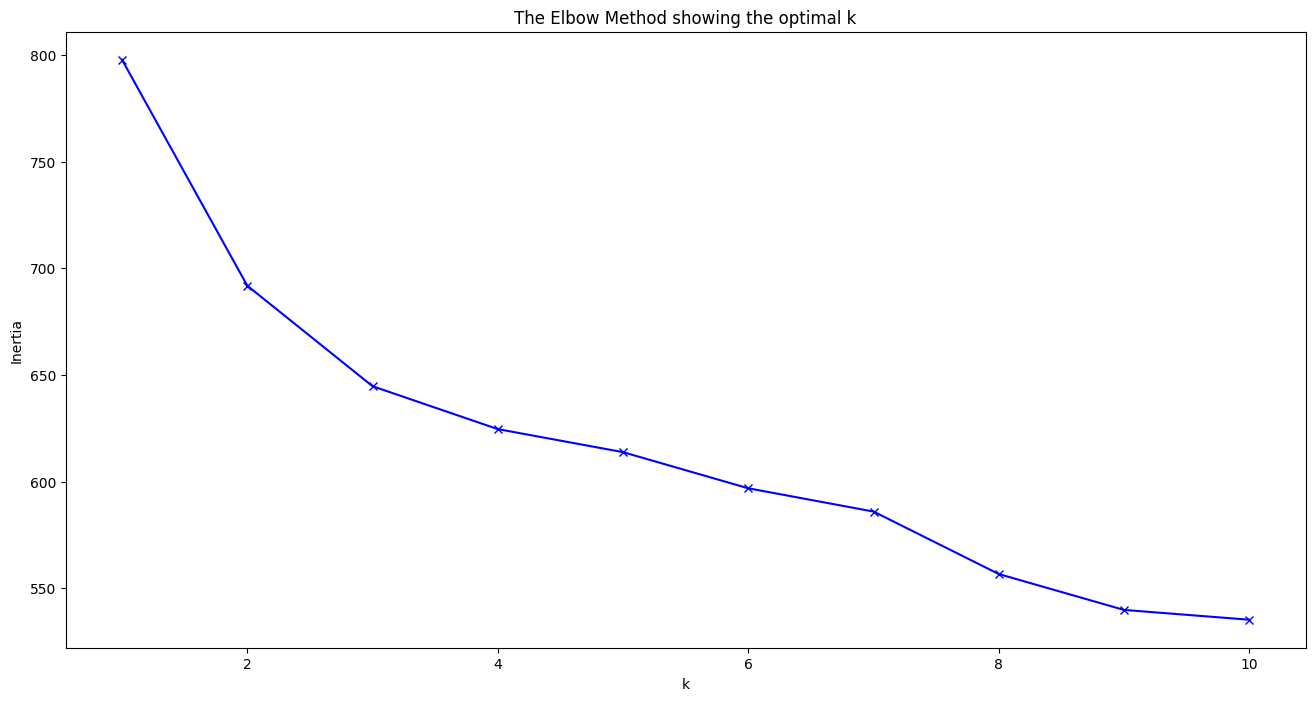

<ipython-input-11-9b23de613c94>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  elbow_df.fillna('-', inplace=True)


,K,Inertia (Distortion),Difference from Previous
0,1,797.812734,-
1,2,691.848666,105.964068
2,3,644.709755,47.138911
3,4,624.596848,20.112907
4,5,613.786109,10.810739
5,6,596.841750,16.94436
6,7,585.929618,10.912131
7,8,556.629505,29.300113
8,9,539.800801,16.828704
9,10,535.207707,4.593094


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

elbow_df = pd.DataFrame({
    'K': list(K),
    'Inertia (Distortion)': distortions
})

# Hitung selisih antar inertia
elbow_df['Difference from Previous'] = elbow_df['Inertia (Distortion)'].shift(1) - elbow_df['Inertia (Distortion)']

# Karena untuk K=1 tidak ada perbandingan sebelumnya
elbow_df.fillna('-', inplace=True)


elbow_df

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters1 = kmeans.fit_predict(df_cluster)

<ipython-input-13-67ecf5bf3314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = clusters1
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


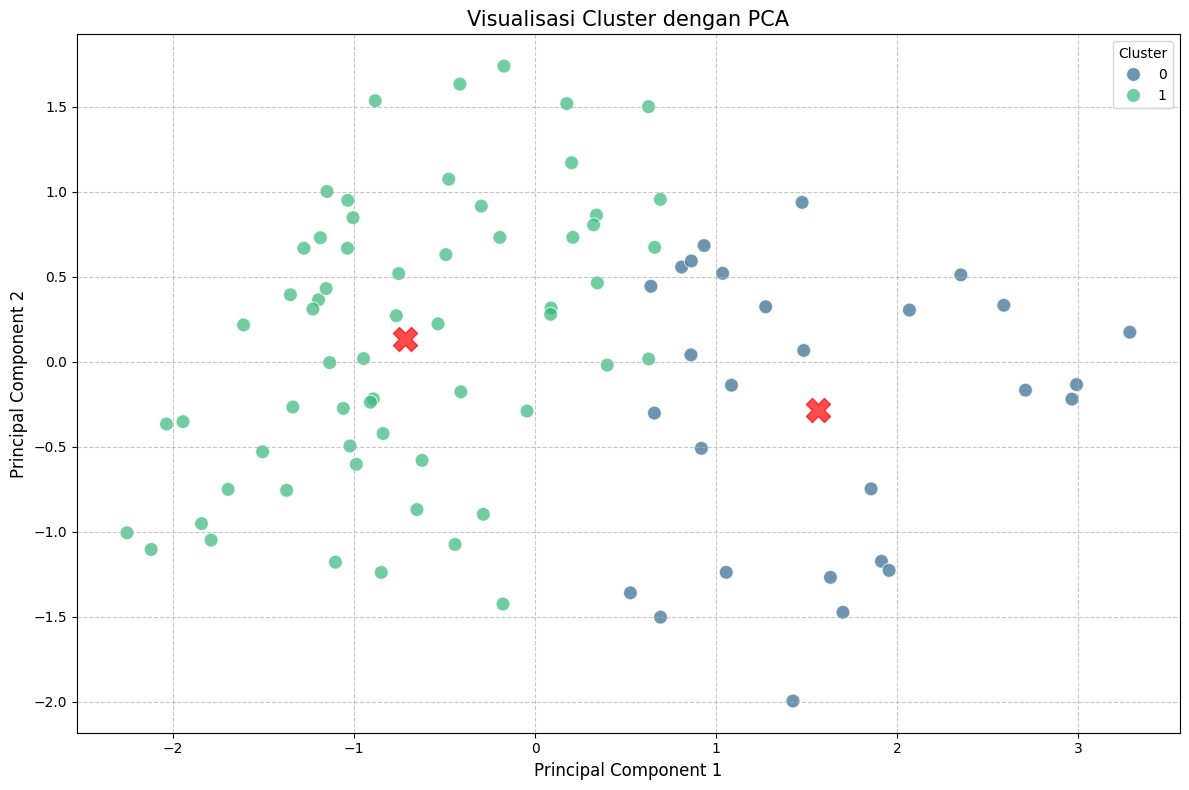

In [13]:
# Menambahkan hasil clustering ke dataframe
df_cluster['Cluster'] = clusters1

# Visualisasi dengan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cluster.drop('Cluster', axis=1))

# Membuat dataframe untuk visualisasi
df_pca = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = clusters1

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2',
                hue='Cluster', palette='viridis',
                data=df_pca, s=100, alpha=0.7)

plt.title('Visualisasi Cluster dengan PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan centroid cluster
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', alpha=0.7, label='Centroids')

plt.tight_layout()
plt.show()

In [14]:
# Analisis silhouette score untuk mengevaluasi kualitas clustering
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_cluster.drop('Cluster', axis=1), clusters1)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1323


In [15]:
# Menghitung jumlah anggota tiap cluster
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
print("\nJumlah anggota tiap cluster:")
cluster_counts


Jumlah anggota tiap cluster:


,count
Cluster,
0,28
1,61


In [16]:
# # Visualisasi distribusi fitur untuk setiap cluster
# features = df_cluster.drop('Cluster', axis=1).columns
# n_features = len(features)
# n_cols = 3
# n_rows = (n_features + n_cols - 1) // n_cols

# plt.figure(figsize=(16, 4*n_rows))
# for i, feature in enumerate(features):
#     plt.subplot(n_rows, n_cols, i+1)
#     for cluster in range(3):
#         sns.kdeplot(df_cluster[df_cluster['Cluster'] == cluster][feature], label=f'Cluster {cluster}')
#     plt.title(f'Distribusi {feature} berdasarkan Cluster')
#     plt.legend()
# plt.tight_layout()
# plt.show()

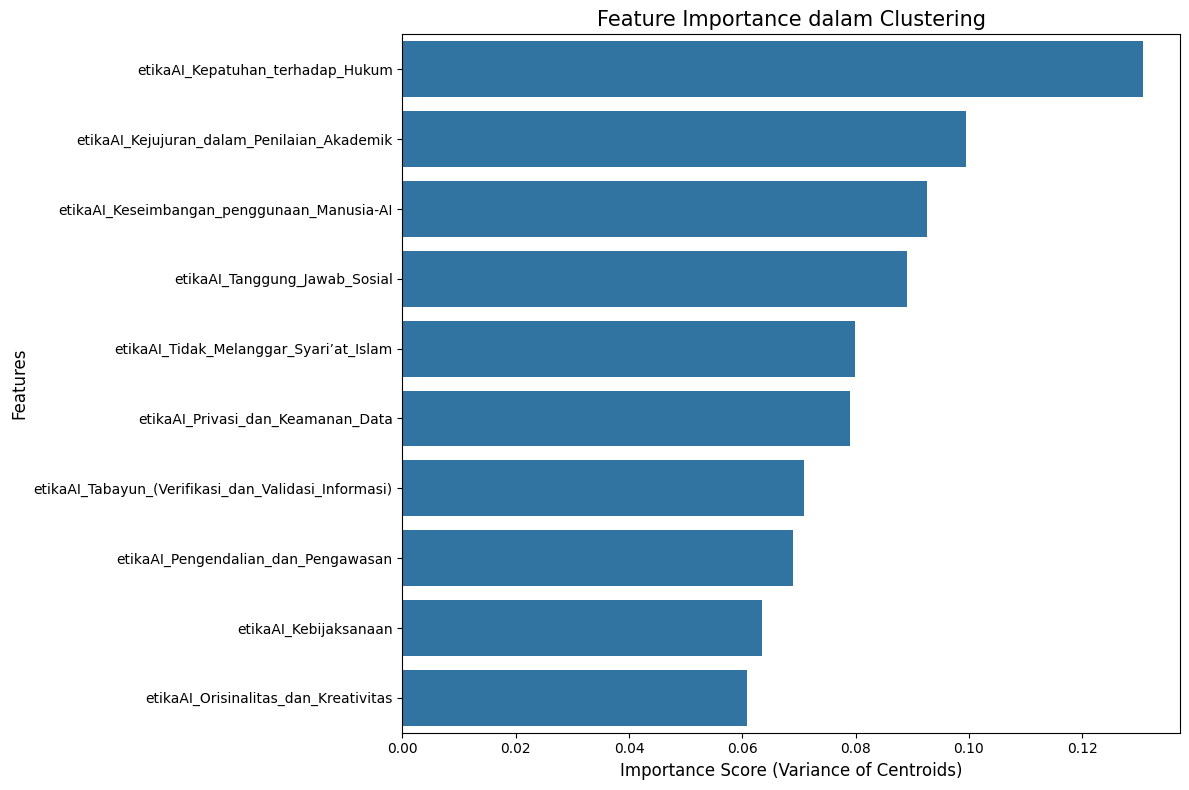

In [17]:
# Menghitung feature importance berdasarkan jarak antar centroid
# Mengambil data asli dari fitur
X = df_cluster.drop('Cluster', axis=1)

# Mendapatkan fitur-fitur (nama kolom)
feature_names = X.columns

# Menghitung feature importance berdasarkan variansi centroid
importance = np.var(kmeans.cluster_centers_, axis=0)
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

top_10_features = feature_importance.head(10)

# Visualisasi feature importance dengan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Feature Importance dalam Clustering', fontsize=15)
plt.xlabel('Importance Score (Variance of Centroids)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
cluster_centers = kmeans.cluster_centers_

# Feature importance for each cluster

# Calculate feature importance by comparing cluster centers to overall mean
features_only = df_cluster.drop(columns=['Cluster'])  # pastikan 'Cluster' nama kolomnya
overall_mean = features_only.mean()

for i in range(len(cluster_centers)):
    # Calculate absolute difference from overall mean for this cluster
    importance = abs(cluster_centers[i] - overall_mean.values)

    # Create dataframe of feature importance for this cluster
    importance_df = pd.DataFrame({
        'Feature': features_only.columns,
        'Importance': importance
    })

    # Sort by importance and display top features
    importance_df = importance_df.sort_values('Importance', ascending=False)

    print(f"\nCluster {i} - Most Important Features:")
    print(importance_df.head(5))  # Show top 5 features


Cluster 0 - Most Important Features:
                                       Feature  Importance
59            etikaAI_Kepatuhan_terhadap_Hukum    0.495586
58  etikaAI_Kejujuran_dalam_Penilaian_Akademik    0.432183
60  etikaAI_Keseimbangan_penggunaan_Manusia-AI    0.416934
68               etikaAI_Tanggung_Jawab_Sosial    0.408909
69      etikaAI_Tidak_Melanggar_Syari’at_Islam    0.387239

Cluster 1 - Most Important Features:
                                       Feature  Importance
59            etikaAI_Kepatuhan_terhadap_Hukum    0.227482
58  etikaAI_Kejujuran_dalam_Penilaian_Akademik    0.198379
60  etikaAI_Keseimbangan_penggunaan_Manusia-AI    0.191380
68               etikaAI_Tanggung_Jawab_Sosial    0.187696
69      etikaAI_Tidak_Melanggar_Syari’at_Islam    0.177749


In [19]:
df_cluster[numerical_cols] = scaler.inverse_transform(df_cluster[numerical_cols])
df_cluster['AI_Guideline_Encoded'] = df_cluster['AI_Guideline_Encoded'].round().astype(int)

df_cluster['AI_Guideline_Encoded'] = scaler2.inverse_transform(df_cluster[['AI_Guideline_Encoded']])
df_cluster['AI_Guideline_Encoded'] = df_cluster['AI_Guideline_Encoded'].round().astype(int)

# Inversi mapping
reverse_gender_mapping = {v: k for k, v in gender_mapping.items()}
reverse_age_mapping = {v: k for k, v in age_mapping.items()}
reverse_ai_familiarity_mapping = {v: k for k, v in ai_familiarity_mapping.items()}
reverse_ai_guideline_mapping = {v: k for k, v in ai_guideline_mapping.items()}

# Buat kolom baru di df_cluster yang menampilkan hasil inverse mapping
df_cluster['Jenis_Kelamin_Encoded'] = df_cluster['Jenis_Kelamin_Encoded'].map(reverse_gender_mapping)
df_cluster['Usia_Encoded'] = df_cluster['Usia_Encoded'].map(reverse_age_mapping)
df_cluster['AI_Familiarity_Encoded'] = df_cluster['AI_Familiarity_Encoded'].map(reverse_ai_familiarity_mapping)
df_cluster['AI_Guideline_Encoded'] = df_cluster['AI_Guideline_Encoded'].map(reverse_ai_guideline_mapping)


<ipython-input-19-88979a813e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[numerical_cols] = scaler.inverse_transform(df_cluster[numerical_cols])
<ipython-input-19-88979a813e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['AI_Guideline_Encoded'] = df_cluster['AI_Guideline_Encoded'].round().astype(int)
<ipython-input-19-88979a813e77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [20]:
df_cluster.head()

,"Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?","Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?","Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?",Seberapa nyaman Anda dengan integrasi teknologi AI dalam pembelajaran?,Seberapa paham Anda tentang pentingnya penggunaan teknologi AI secara bijak dan beretika?,"Menurut Anda, apakah penting bagi PTKI untuk memiliki pedoman dalam penggunaan teknologi AI?",Bagaimana Anda menilai kemampuan Anda dalam membedakan hasil kerja manusia dan hasil kerja AI?,Jenis_Kelamin_Encoded,Usia_Encoded,AI_Familiarity_Encoded,...,etikaAI_Tanggung_Jawab,etikaAI_Tanggung_Jawab_Sosial,etikaAI_Tidak_Melanggar_Syari’at_Islam,etikaAI_Tidak_menggunakan_AI_untuk_melakukan_tindak_penipuan_dan_kejahatan,etikaAI_Transparansi_(Kejujuran),langkah_Integrasi_AI_ke_dalam_kurikulum,langkah_Pelatihan_AI_bagi_dosen_dan_mahasiswa,langkah_Penelitian_tentang_AI_berbasis_nilai_Islam,langkah_Penyusunan_pedoman_etika_Islami_terkait_AI,Cluster
0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,Laki-Laki,20–30 tahun,Ya,...,1,1,1,0,1,0,1,0,1,0
1,5.0,5.0,3.0,4.0,4.0,4.0,3.0,Laki-Laki,20–30 tahun,Ya,...,1,0,1,0,1,1,1,0,1,1
2,5.0,5.0,5.0,5.0,4.0,4.0,3.0,Laki-Laki,20–30 tahun,Ya,...,1,0,0,0,0,0,1,0,0,1
3,5.0,5.0,4.0,5.0,5.0,5.0,2.0,Laki-Laki,20–30 tahun,Ya,...,0,0,1,0,1,1,1,1,1,1
4,5.0,5.0,5.0,4.0,3.0,3.0,4.0,Laki-Laki,20–30 tahun,Ya,...,1,0,0,0,1,0,1,0,1,1


In [22]:
# --- Menentukan fitur numerik dan kategorikal secara otomatis ---
numerical_cols = df_cluster.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_cluster.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Pastikan kolom 'Cluster' tidak ikut terhitung sebagai fitur
numerical_cols = [col for col in numerical_cols if col != 'Cluster']
categorical_cols = [col for col in categorical_cols if col != 'Cluster']

# --- Statistik deskriptif per kolom ---

print("\nStatistik deskriptif per fitur (dibandingkan antar cluster):")

# Fitur Numerik
print("\n--- Fitur Numerik ---")
for col in numerical_cols:
    print(f"\nFitur: {col}")
    summary = []
    for cluster_id in sorted(df_cluster['Cluster'].unique()):
        cluster_data = df_cluster[df_cluster['Cluster'] == cluster_id][col]
        stats = {
            'Cluster': cluster_id,
            'Min': round(cluster_data.min(), 2),
            'Max': round(cluster_data.max(), 2),
            'Mean': round(cluster_data.mean(), 2),
            'Median': round(cluster_data.median(), 2),
            'Std': round(cluster_data.std(), 2)
        }
        summary.append(stats)
    display(pd.DataFrame(summary))

# Fitur Kategorikal
print("\n--- Fitur Kategorikal ---")
for col in categorical_cols:
    print(f"\nFitur: {col}")
    summary = []
    for cluster_id in sorted(df_cluster['Cluster'].unique()):
        cluster_data = df_cluster[df_cluster['Cluster'] == cluster_id]
        value_counts = cluster_data[col].value_counts(normalize=True)
        for val, count in value_counts.items():
            summary.append({
                'Cluster': cluster_id,
                'Value': val,
                'Percentage': f"{count:.2%}"
            })
    display(pd.DataFrame(summary))



Statistik deskriptif per fitur (dibandingkan antar cluster):

--- Fitur Numerik ---

Fitur: Jika ya, seberapa sering Anda menggunakan teknologi AI dalam aktivitas sehari-hari (misalnya, ChatGPT, Google Translate, Grammarly, atau lainnya)?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.39,5.0,0.74
1,1,2.0,5.0,4.25,4.0,0.75



Fitur: Menurut Anda, bagaimana potensi AI dalam mendukung pengembangan pembelajaran di Perguruan Tinggi Keagamaan Islam (PTKI)?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.54,5.0,0.64
1,1,3.0,5.0,4.39,4.0,0.56



Fitur: Seberapa sering Anda menggunakan teknologi AI dalam kegiatan akademik, seperti tugas, penelitian, atau pembelajaran?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.11,4.0,0.69
1,1,2.0,5.0,3.87,4.0,0.74



Fitur: Seberapa nyaman Anda dengan integrasi teknologi AI dalam pembelajaran?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.25,4.0,0.75
1,1,3.0,5.0,4.02,4.0,0.70



Fitur: Seberapa paham Anda tentang pentingnya penggunaan teknologi AI secara bijak dan beretika?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.21,4.0,0.74
1,1,2.0,5.0,3.97,4.0,0.75



Fitur: Menurut Anda, apakah penting bagi PTKI untuk memiliki pedoman dalam penggunaan teknologi AI?


,Cluster,Min,Max,Mean,Median,Std
0,0,3.0,5.0,4.46,5.0,0.64
1,1,3.0,5.0,4.18,4.0,0.72



Fitur: Bagaimana Anda menilai kemampuan Anda dalam membedakan hasil kerja manusia dan hasil kerja AI?


,Cluster,Min,Max,Mean,Median,Std
0,0,1.0,4.0,2.68,3.0,0.90
1,1,1.0,5.0,3.20,3.0,0.87



Fitur: teknologi_Canva


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.82,1.0,0.39
1,1,0,1,0.66,1.0,0.48



Fitur: teknologi_ChatGPT


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.93,1.0,0.26
1,1,0,1,0.95,1.0,0.22



Fitur: teknologi_Claude._Ai


,Cluster,Min,Max,Mean,Median,Std
0,0,0,0,0.00,0.0,0.00
1,1,0,1,0.02,0.0,0.13



Fitur: teknologi_Copilot


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Copy.ai


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,1,0.02,0.0,0.13



Fitur: teknologi_Deep_seek


,Cluster,Min,Max,Mean,Median,Std
0,0,0,0,0.00,0.0,0.00
1,1,0,1,0.02,0.0,0.13



Fitur: teknologi_DeepL


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.46,0.0,0.51
1,1,0,1,0.11,0.0,0.32



Fitur: teknologi_Deepseek


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,1,0.03,0.0,0.18



Fitur: teknologi_Duolingo


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.25,0.0,0.44
1,1,0,1,0.15,0.0,0.36



Fitur: teknologi_Gemini


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.71,1.0,0.46
1,1,0,1,0.46,0.0,0.50



Fitur: teknologi_Google_Meet


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.86,1.0,0.36
1,1,0,1,0.62,1.0,0.49



Fitur: teknologi_Google_Translate


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.89,1.0,0.31
1,1,0,1,0.72,1.0,0.45



Fitur: teknologi_Grammarly


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.50,0.5,0.51
1,1,0,1,0.11,0.0,0.32



Fitur: teknologi_Inciteful


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Infografix


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Infogram_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Instadoodle


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Invideo_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Kahoot!


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.32,0.0,0.48
1,1,0,1,0.15,0.0,0.36



Fitur: teknologi_Mendeley


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.50,0.5,0.51
1,1,0,1,0.18,0.0,0.39



Fitur: teknologi_Mentimeters


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Openknowledgemaps


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,1,0.03,0.0,0.18



Fitur: teknologi_Opsi_1


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Padlet


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,1,0.03,0.0,0.18



Fitur: teknologi_Pictory


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Piktochart


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Poe


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Quillbot


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.25,0.0,0.44
1,1,0,1,0.07,0.0,0.25



Fitur: teknologi_Quizziz


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.43,0.0,0.50
1,1,0,1,0.26,0.0,0.44



Fitur: teknologi_Renderforest


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Scispace


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.11,0.0,0.31
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Speechify


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.11,0.0,0.31
1,1,0,1,0.05,0.0,0.22



Fitur: teknologi_Turnitin


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.54,1.0,0.51
1,1,0,1,0.25,0.0,0.43



Fitur: teknologi_Venngage


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: teknologi_Zoom


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.93,1.0,0.26
1,1,0,1,0.62,1.0,0.49



Fitur: teknologi_blackbox_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,0,0.00,0.0,0.00
1,1,0,1,0.02,0.0,0.13



Fitur: teknologi_copilot


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: risiko_Hilangnya_orisinalitas_berpikir


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.89,1.0,0.31
1,1,0,1,0.79,1.0,0.41



Fitur: risiko_Ketergantungan_pada_teknologi_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.96,1.0,0.19
1,1,0,1,0.87,1.0,0.34



Fitur: risiko_Menurunnya_Rasionalitas_Mahasiswa_maupun_Dosen


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: risiko_Pelanggaran_privasi


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.5,0.5,0.51
1,1,0,1,0.2,0.0,0.40



Fitur: risiko_Plagiarisme_akademik


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.82,1.0,0.39
1,1,0,1,0.57,1.0,0.50



Fitur: risiko_menyebabkan_hilangnya_kreativitas


,Cluster,Min,Max,Mean,Median,Std
0,0,0,0,0.00,0.0,0.00
1,1,0,1,0.02,0.0,0.13



Fitur: etikaAI_Evaluasi_berbasis_Bukti


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.54,1.0,0.51
1,1,0,1,0.15,0.0,0.36



Fitur: etikaAI_Keadilan_dan_Non-diskriminasi


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.43,0.0,0.50
1,1,0,1,0.07,0.0,0.25



Fitur: etikaAI_Keberlanjutan_Sosial


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.50,0.5,0.51
1,1,0,1,0.07,0.0,0.25



Fitur: etikaAI_Kebijaksanaan


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.75,1.0,0.44
1,1,0,1,0.25,0.0,0.43



Fitur: etikaAI_Kejujuran_dalam_Penilaian_Akademik


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.89,1.0,0.31
1,1,0,1,0.26,0.0,0.44



Fitur: etikaAI_Kepatuhan_terhadap_Hukum


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.82,1.0,0.39
1,1,0,1,0.10,0.0,0.30



Fitur: etikaAI_Keseimbangan_penggunaan_Manusia-AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.82,1.0,0.39
1,1,0,1,0.21,0.0,0.41



Fitur: etikaAI_Mandiri_(AI_tidak_lebih_dari_asisten)


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.04,0.0,0.19
1,1,0,0,0.00,0.0,0.00



Fitur: etikaAI_Orisinalitas_dan_Kreativitas


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.82,1.0,0.39
1,1,0,1,0.33,0.0,0.47



Fitur: etikaAI_Pengendalian_dan_Pengawasan


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.61,1.0,0.50
1,1,0,1,0.08,0.0,0.28



Fitur: etikaAI_Privasi_dan_Keamanan_Data


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.86,1.0,0.36
1,1,0,1,0.30,0.0,0.46



Fitur: etikaAI_Sadar_akan_Dampak_Penggunaan_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.93,1.0,0.26
1,1,0,1,0.44,0.0,0.50



Fitur: etikaAI_Tabayun_(Verifikasi_dan_Validasi_Informasi)


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.89,1.0,0.31
1,1,0,1,0.36,0.0,0.48



Fitur: etikaAI_Tanggung_Jawab


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.93,1.0,0.26
1,1,0,1,0.57,1.0,0.50



Fitur: etikaAI_Tanggung_Jawab_Sosial


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.68,1.0,0.48
1,1,0,1,0.08,0.0,0.28



Fitur: etikaAI_Tidak_Melanggar_Syari’at_Islam


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.89,1.0,0.31
1,1,0,1,0.33,0.0,0.47



Fitur: etikaAI_Tidak_menggunakan_AI_untuk_melakukan_tindak_penipuan_dan_kejahatan


,Cluster,Min,Max,Mean,Median,Std
0,0,0,0,0.00,0.0,0.00
1,1,0,1,0.02,0.0,0.13



Fitur: etikaAI_Transparansi_(Kejujuran)


,Cluster,Min,Max,Mean,Median,Std
0,0,1,1,1.0,1.0,0.00
1,1,0,1,0.7,1.0,0.46



Fitur: langkah_Integrasi_AI_ke_dalam_kurikulum


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.68,1.0,0.48
1,1,0,1,0.48,0.0,0.50



Fitur: langkah_Pelatihan_AI_bagi_dosen_dan_mahasiswa


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.79,1.0,0.42
1,1,0,1,0.79,1.0,0.41



Fitur: langkah_Penelitian_tentang_AI_berbasis_nilai_Islam


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.54,1.0,0.51
1,1,0,1,0.34,0.0,0.48



Fitur: langkah_Penyusunan_pedoman_etika_Islami_terkait_AI


,Cluster,Min,Max,Mean,Median,Std
0,0,0,1,0.71,1.0,0.46
1,1,0,1,0.48,0.0,0.50



--- Fitur Kategorikal ---

Fitur: Jenis_Kelamin_Encoded


,Cluster,Value,Percentage
0,0,Laki-Laki,60.71%
1,0,Perempuan,39.29%
2,1,Laki-Laki,72.13%
3,1,Perempuan,27.87%



Fitur: Usia_Encoded


,Cluster,Value,Percentage
0,0,20–30 tahun,85.71%
1,0,< 20 tahun,14.29%
2,1,20–30 tahun,90.16%
3,1,< 20 tahun,9.84%



Fitur: AI_Familiarity_Encoded


,Cluster,Value,Percentage
0,0,Ya,100.00%
1,1,Ya,100.00%



Fitur: AI_Guideline_Encoded


,Cluster,Value,Percentage
0,0,Tidak,75.00%
1,0,Ya,25.00%
2,1,Tidak,67.21%
3,1,Ya,32.79%


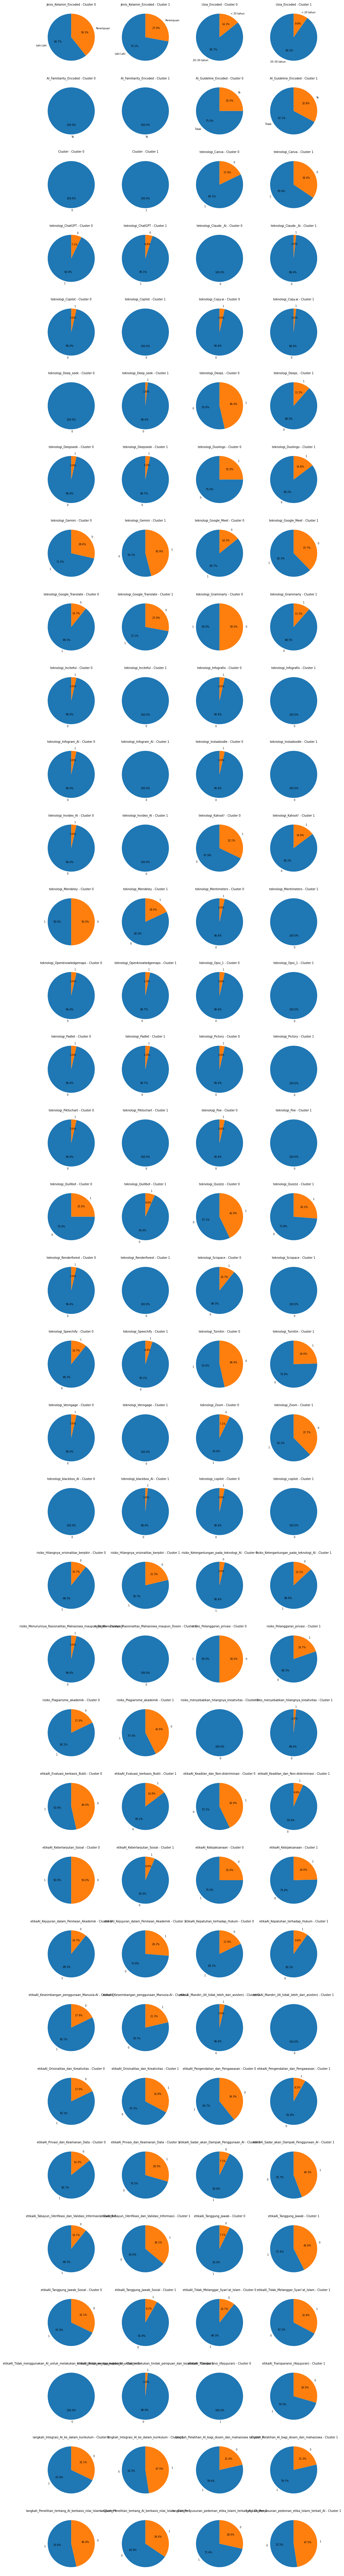

In [43]:
import matplotlib.pyplot as plt

all_features = []

# Gabungkan semua fitur kategorikal dan numerik biner (yang uniknya <=2)
for col in categorical_cols:
    all_features.append(col)

for col in numerical_cols:
    if df_cluster[col].dropna().nunique() <= 2:
        all_features.append(col)

n_clusters = df_cluster['Cluster'].nunique()
n_features = len(all_features)
total_charts = n_features * n_clusters

n_cols = 4  # Banyak kolom dalam grid
n_rows = (total_charts + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5 * n_cols, 2.5 * n_rows))
axes = axes.flatten()

plot_idx = 0
for col in all_features:
    for cluster_id in sorted(df_cluster['Cluster'].unique()):
        ax = axes[plot_idx]
        cluster_data = df_cluster[df_cluster['Cluster'] == cluster_id][col]
        value_counts = cluster_data.value_counts()

        # Label pie
        if col in categorical_cols:
            labels = value_counts.index
        else:
            labels = [str(int(v)) for v in value_counts.index]

        ax.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
        ax.set_title(f'{col} - Cluster {cluster_id}', fontsize=7)
        plot_idx += 1

# Hapus sisa subplot jika jumlahnya tidak pas
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=1)
plt.show()


<ipython-input-45-3edba62ee4b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Jumlah_Teknologi'] = df_cluster[teknologi_cols].sum(axis=1)
<ipython-input-45-3edba62ee4b4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_teknologi_per_cluster, x='Cluster', y='Jumlah_Teknologi', palette='viridis')


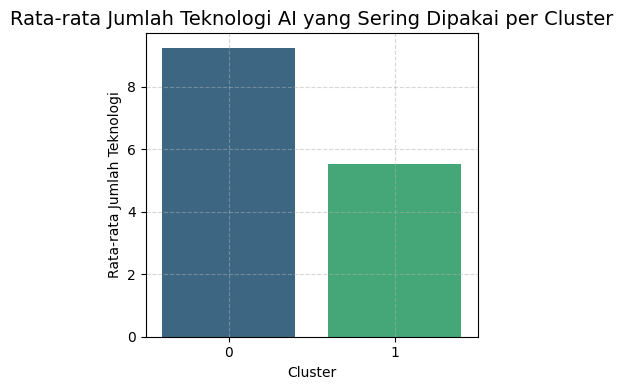

In [45]:
# Ambil kolom-kolom teknologi (hasil one-hot encoding)
teknologi_cols = [col for col in df_cluster.columns if col.startswith('teknologi_')]

# Hitung jumlah teknologi yang diketahui per responden
df_cluster['Jumlah_Teknologi'] = df_cluster[teknologi_cols].sum(axis=1)

mean_teknologi_per_cluster = df_cluster.groupby('Cluster')['Jumlah_Teknologi'].mean().reset_index()

# Visualisasi dengan bar chart
plt.figure(figsize=(4, 4))
sns.barplot(data=mean_teknologi_per_cluster, x='Cluster', y='Jumlah_Teknologi', palette='viridis')

plt.title('Rata-rata Jumlah Teknologi AI yang Sering Dipakai per Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Teknologi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

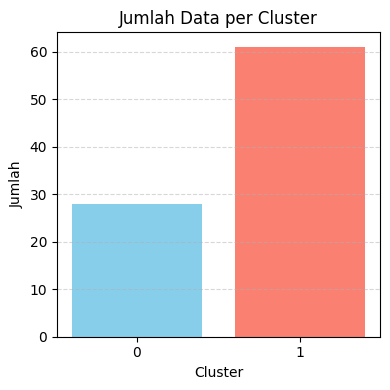

In [44]:
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()

# Plot barchart
plt.figure(figsize=(4, 4))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color=['skyblue', 'salmon'])
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Interpretasi Cluster

1. CLuster 0: Engaged AI Ethicists and Power Users

  **Karakteristik Utama:**
  - Pengguna aktif berbagai teknologi AI dengan tingkat penggunaan tinggi (mean 4.39/5) dalam aktivitas sehari-hari
  - Sangat optimis terhadap potensi AI di PTKI (mean 4.54/5)
  - Tingkat kenyamanan dan pemahaman yang tinggi tentang teknologi AI
  - Penggunaan lebih bervariasi dan intensif dari banyak tools AI (Grammarly 50%, DeepL 46%, Gemini 71%)
  - Sangat mendukung adanya pedoman penggunaan AI di PTKI (mean 4.46/5)
  - Pemahaman yang lebih mendalam tentang etika AI dari perspektif Islam

  **Cara Berpikir & Sikap terhadap AI:**
  - Critical thinkers yang sadar akan etika dan dampak penggunaan AI
  - Menekankan prinsip transparansi (100%) dan tanggung jawab (93%) dalam penggunaan AI
  - Sangat sadar akan risiko ketergantungan pada AI (96%) dan plagiarisme akademik (82%)
  - Lebih sadar akan isu privasi dan keamanan data (86%)
  - Peduli pada keseimbangan penggunaan manusia-AI (82%) dan nilai-nilai Islam (89%)
  - Meskipun mereka pengguna aktif, mereka memiliki kesadaran kritis yang tinggi

  **Saran untuk PTKI dari mereka:**
  - Mendukung integrasi AI ke dalam kurikulum (68%)
  - Memprioritaskan pelatihan AI untuk dosen dan mahasiswa (79%)
  - Mengembangkan pedoman etika Islami terkait AI (71%)
  - Menjaga keseimbangan antara manfaat teknologi dan nilai-nilai akademik tradisional


2. Cluster 1: Pragmatic AI Users

  **Karakteristik Utama:**
  - Pengguna moderat teknologi AI (mean 4.25/5) dalam aktivitas sehari-hari
  - Melihat potensi AI di PTKI (mean 4.39/5) namun tidak seoptimis Cluster 0
  - Lebih selektif dalam penggunaan tools AI, fokus pada yang umum seperti ChatGPT (95%)
  - Cenderung kurang menggunakan alat-alat AI spesifik
  - Lebih baik dalam membedakan hasil kerja manusia vs AI (mean 3.20/5)
  - Kurang familiar dengan pedoman etika AI yang formal

  **Cara Berpikir & Sikap terhadap AI:**
  - Pendekatan lebih pragmatis dan berorientasi pada tugas spesifik
  - Kurang fokus pada aspek etis dibanding Cluster 0 (nilai lebih rendah pada hampir semua aspek etika)
  - Mengakui risiko ketergantungan (87%) dan hilangnya orisinalitas (79%)
  - Kurang menekankan pada privasi (hanya 20% vs 50% di Cluster 0)
  - Prinsip utama hanya transparansi (70%) dan tanggung jawab (57%)

  **Saran untuk PTKI dari mereka:**
  - Mendukung pelatihan AI bagi dosen dan mahasiswa (79%)
  - Cenderung netral tentang integrasi AI ke kurikulum (48%)
  - Kurang menekankan penelitian AI berbasis nilai Islam (34%)
  - Fokus pada penggunaan praktis daripada diskusi filosofis/etis


# Ringkasan Perbandingan

1. Cluster 0: Engaged AI Ethicists and Power Users
Mahasiswa di cluster ini adalah power users sekaligus critical thinkers—mereka tidak hanya menggunakan beragam teknologi AI secara intensif, tetapi juga sangat reflektif terhadap dimensi etika dan dampak sosial. Mereka sangat menekankan keselarasan antara AI dan nilai-nilai Islam, serta peduli pada aspek seperti transparansi, tanggung jawab, dan keadilan. Kelompok ini ideal sebagai agen perubahan dan champion literasi AI di lingkungan kampus.
2. Cluster 1: Pragmatic AI Users
Mahasiswa di cluster ini adalah pengguna pragmatis yang fokus pada manfaat praktis AI untuk tugas akademik. Mereka cenderung menggunakan tools AI yang populer dan umum, dengan perhatian yang lebih rendah pada aspek etika dan nilai-nilai Islam. Mereka lebih baik dalam membedakan hasil kerja manusia vs AI, namun kurang menekankan pentingnya pedoman formal dan integrasi nilai-nilai Islam dalam penggunaan AI.

Implikasi untuk PTKI adalah perlu adanya pendekatan dua arah: memanfaatkan kesadaran etis dan antusiasme Cluster 0 sebagai champion, sambil mengembangkan kesadaran etis yang lebih kuat pada Cluster 1 melalui pelatihan dan pedoman yang konkret dan aplikatif.